# 2015 Elections

# Imports

In [1]:
import pandas as pd
import itertools
from datetime import timedelta
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_context("poster")
plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold' 

from IPython.display import display, HTML

import numpy as np
import math

import datetime
import time
import sys

import networkx as nx

import sklearn
print("sklearn.__version__:",sklearn.__version__)

import pylab as pl
import matplotlib.dates as mdates

#print('Machine: {} {}\n'.format(os.uname().sysname,os.uname().machine))
print(sys.version)

sklearn.__version__: 0.19.0
3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]


# Data Import

In [2]:
file_name = "results_by_booth_2015 - english - v3_utf8.csv"
result_df = pd.read_csv(file_name,delimiter=',')
print("Columns:")
print(result_df.columns)
print()
print("df shape:",result_df.shape)
result_df.tail(5)

Columns:
Index(['Settlement_name_hebrew', 'Settlement_code', 'settlement_name_english',
       'Booth_number', 'Registered_voters', 'votes', 'bad_votes',
       'proper_votes', 'Ale Yarok', 'Arab List', 'Democratura', 'Green Party',
       'Haim Bekavod', 'Hope for change', 'Joint List', 'Kalkala', 'Kulanu',
       'Likud', 'Meretz', 'Moreshet Avot', 'Na Nach',
       'National Team (temporary)', 'Or', 'Perach', 'Pirate Party', 'Shas',
       'The Jewish Home', 'Ubizchutan', 'United Torah Judaism', 'Yachad',
       'Yesh Atid', 'Yisrael Beiteinu', 'Zionist Union'],
      dtype='object')

df shape: (10414, 33)


,Settlement_name_hebrew,Settlement_code,settlement_name_english,Booth_number,Registered_voters,votes,bad_votes,proper_votes,Ale Yarok,Arab List,...,Perach,Pirate Party,Shas,The Jewish Home,Ubizchutan,United Torah Judaism,Yachad,Yesh Atid,Yisrael Beiteinu,Zionist Union
10409,תקוע,3563,TEQOA,2.0,476,369,1,368,3,0,...,0,0,2,144,2,7,32,4,13,9
10410,תקוע,3563,TEQOA,3.0,645,533,0,533,9,0,...,0,0,5,265,2,3,48,4,14,6
10411,תראבין א-צאנע (שב,970,TARABIN AS-SANI,1.0,639,106,0,106,0,5,...,0,0,2,0,0,0,0,0,0,2
10412,תראבין א-צאנע(ישו,1346,TARABIN AS-SANI,1.0,176,60,0,60,0,3,...,0,0,3,1,0,1,0,0,0,1
10413,תרום,778,TARUM,1.0,482,411,2,409,5,0,...,0,0,37,111,0,4,24,13,1,23


# Clean Data

In [3]:
result_df = result_df.dropna(axis=0, how='any')
result_df = result_df[result_df.votes > 0]
result_df.loc[result_df.Registered_voters == 0,'Registered_voters'] = result_df[result_df.Registered_voters == 0].votes
result_df.shape

(10412, 33)

# Overall Votes Per Party

In [4]:
block_percent = 0.0325

all registerd voters: 6114936
all_votes: 4210884
vote percentage: 0.6886227427400712


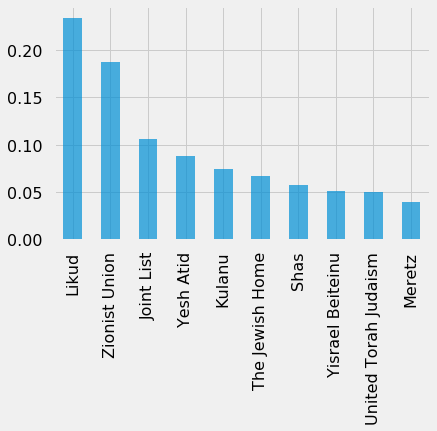

In [5]:
all_registered_voters = result_df.Registered_voters.sum()
all_votes = result_df.proper_votes.sum()
print("all registerd voters:",all_registered_voters)
print("all_votes:",all_votes)
print("vote percentage:",all_votes/all_registered_voters)
overall_votes_per_party = result_df.iloc[:,8:].sum()
percantage_vote_per_pary = overall_votes_per_party/all_votes
percantage_vote_per_pary = percantage_vote_per_pary[percantage_vote_per_pary.values>block_percent]
percantage_vote_per_pary.sort_values(ascending=False).plot.bar(alpha=0.7)

# Group by City and Filter Out Small Parties

In [6]:
# Print the large parties
large_parties = percantage_vote_per_pary.index.values
print(large_parties)

['Joint List' 'Kulanu' 'Likud' 'Meretz' 'Shas' 'The Jewish Home'
 'United Torah Judaism' 'Yesh Atid' 'Yisrael Beiteinu' 'Zionist Union']


In [7]:
non_party_col = list(result_df.iloc[:,0:8].columns)
int_columns = []
int_columns.extend(non_party_col)
int_columns.extend(list(large_parties))
print(int_columns)

['Settlement_name_hebrew', 'Settlement_code', 'settlement_name_english', 'Booth_number', 'Registered_voters', 'votes', 'bad_votes', 'proper_votes', 'Joint List', 'Kulanu', 'Likud', 'Meretz', 'Shas', 'The Jewish Home', 'United Torah Judaism', 'Yesh Atid', 'Yisrael Beiteinu', 'Zionist Union']


In [8]:
res_work_df = result_df.copy()
res_work_df = res_work_df[int_columns]
res_work_df_city = res_work_df.groupby(['settlement_name_english','Settlement_code'])[int_columns[4:]].sum().reset_index()
print(res_work_df_city.shape)
res_work_df_city.head(5)

(1196, 16)


,settlement_name_english,Settlement_code,Registered_voters,votes,bad_votes,proper_votes,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union
0,A'SAM,963,4129,1331,25,1306,1055,9,10,9,85,1,4,1,3,80
1,ABBIRIM,1220,160,123,1,122,3,6,9,34,4,0,0,12,1,48
2,ABU ABDUN,958,119,37,1,36,35,0,0,0,0,0,0,0,0,0
3,ABU GHOSH,472,4178,2539,33,2506,2114,21,58,41,35,10,4,14,5,143
4,ABU JUWEI'ID,967,1610,313,7,306,242,1,3,8,2,0,0,1,0,39


# Remove low votings rates

In [9]:
min_vote_rate = 0.6
min_proper_votes = 300

In [10]:
res_work_df = res_work_df_city.copy()
res_work_df['vote_rate'] = res_work_df.proper_votes / res_work_df.Registered_voters
res_work_df = res_work_df[(res_work_df.vote_rate > min_vote_rate) & (res_work_df.proper_votes > min_proper_votes)]
print(res_work_df.shape)
res_work_df.sample(10)

(724, 17)


,settlement_name_english,Settlement_code,Registered_voters,votes,bad_votes,proper_votes,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union,vote_rate
1037,SHO'EVA,741,425,337,0,337,1,28,74,35,5,16,4,52,7,108,0.792941
206,DABURIYYA,489,6074,4512,8,4504,4397,3,10,22,11,3,0,1,9,15,0.741521
1051,TA'OZ,752,405,328,0,328,2,31,106,14,28,48,2,35,1,52,0.809877
292,EZ EFRAYIM,3778,955,807,4,803,0,48,280,12,24,285,4,42,25,38,0.840838
1132,YASHRESH,828,666,514,6,508,0,98,193,9,29,31,4,48,7,77,0.762763
498,KEFAR BIALIK,220,417,318,1,317,0,22,50,17,0,22,1,50,5,148,0.760192
249,ELYAKHIN,41,2459,1955,17,1938,1,314,661,20,210,212,43,94,10,286,0.788125
836,OR HANER,67,570,444,1,443,0,19,19,46,1,7,0,43,1,301,0.777193
282,ESHHAR,1188,488,382,2,380,0,29,51,29,1,96,1,60,6,99,0.778689
647,MASSU'OT YIZHAQ,620,468,394,1,393,1,9,38,10,1,278,0,20,3,19,0.839744


In [11]:
res_work_df[res_work_df.settlement_name_english.str.contains("BE'ER SHEVA|TEL AVIV|JERU|HAI")] # BE'ER SHEVA / TEL AVIV / JERUSALEM 

,settlement_name_english,Settlement_code,Registered_voters,votes,bad_votes,proper_votes,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union,vote_rate
119,BE'ER SHEVA,9000,156696,98505,1352,97153,531,8548,36614,1357,6178,6782,676,7364,11721,11887,0.620009
387,HAIFA,4000,243274,151318,1758,149560,12363,12697,31025,6783,3342,8032,4894,16826,12010,37805,0.614780
462,JERUSALEM,3000,385888,258879,3593,255286,3148,11949,61874,10166,30579,21266,53948,10752,6032,24696,0.661555
1071,TEL AVIV - YAFO,5000,403338,263205,1860,261345,8488,17989,47526,34056,10189,8772,2628,30241,5446,89567,0.647955


## Check if there bad rows with infinite values

In [12]:
res_work_df[res_work_df.vote_rate == np.inf]

,settlement_name_english,Settlement_code,Registered_voters,votes,bad_votes,proper_votes,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union,vote_rate


# Calculate percentage votes for each city-party

In [13]:
res_work_df_percentage_votes = res_work_df.iloc[:,6:-1].div(res_work_df.proper_votes, axis=0)
res_work_df_percentage_votes.head(5)

,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union
9,0.661678,0.027497,0.044379,0.011486,0.037069,0.001740,0.000522,0.007135,0.139053,0.052036
12,0.002625,0.055118,0.506562,0.023622,0.068241,0.204724,0.002625,0.039370,0.026247,0.031496
14,0.000000,0.086876,0.165434,0.035120,0.002773,0.047135,0.000924,0.231054,0.012939,0.400185
16,0.003279,0.029508,0.042623,0.075410,0.006557,0.026230,0.000000,0.111475,0.006557,0.681967
18,0.001385,0.023546,0.024931,0.098338,0.001385,0.029086,0.002770,0.078947,0.011080,0.703601


# Clustering

In [14]:
res_work_df_percentage_votes_transpose = res_work_df_percentage_votes.transpose()
res_work_df_percentage_votes_transpose.head(11)

,9,12,14,16,18,19,22,23,24,25,...,1178,1179,1181,1184,1185,1186,1189,1190,1192,1194
Joint List,0.661678,0.002625,0.000000,0.003279,0.001385,0.000742,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005181,0.003333,0.027829,0.002309,0.000000,0.004050,0.001497,0.000543,0.000000
Kulanu,0.027497,0.055118,0.086876,0.029508,0.023546,0.086564,0.053066,0.051570,0.155689,0.154128,...,0.052747,0.031088,0.045000,0.018553,0.046189,0.060672,0.078637,0.077844,0.085870,0.045356
Likud,0.044379,0.506562,0.165434,0.042623,0.024931,0.442160,0.305425,0.576233,0.477545,0.269725,...,0.125275,0.113990,0.090000,0.035250,0.043880,0.294691,0.265272,0.102545,0.151630,0.079914
Meretz,0.011486,0.023622,0.035120,0.075410,0.098338,0.009167,0.002358,0.004484,0.001497,0.022018,...,0.092308,0.290155,0.123333,0.168831,0.064665,0.008667,0.092474,0.063623,0.050000,0.060475
Shas,0.037069,0.068241,0.002773,0.006557,0.001385,0.059586,0.370283,0.069507,0.235030,0.022018,...,0.000000,0.000000,0.001667,0.000000,0.000000,0.009751,0.014850,0.005240,0.008696,0.006479
The Jewish Home,0.001740,0.204724,0.047135,0.026230,0.029086,0.057534,0.159198,0.147982,0.023952,0.064220,...,0.052747,0.023316,0.028333,0.016698,0.020785,0.419285,0.071212,0.035180,0.061413,0.049676
United Torah Judaism,0.000522,0.002625,0.000924,0.000000,0.002770,0.018596,0.029481,0.020179,0.020958,0.003670,...,0.004396,0.000000,0.001667,0.001855,0.002309,0.005417,0.004050,0.005240,0.002717,0.004320
Yesh Atid,0.007135,0.039370,0.231054,0.111475,0.078947,0.070063,0.005896,0.024664,0.019461,0.163303,...,0.184615,0.088083,0.151667,0.074212,0.087760,0.061755,0.141073,0.197605,0.230978,0.196544
Yisrael Beiteinu,0.139053,0.026247,0.012939,0.006557,0.011080,0.109525,0.002358,0.006726,0.001497,0.007339,...,0.019780,0.007772,0.008333,0.000000,0.002309,0.013001,0.034425,0.001497,0.016848,0.017279
Zionist Union,0.052036,0.031496,0.400185,0.681967,0.703601,0.110485,0.003538,0.015695,0.038922,0.269725,...,0.441758,0.427461,0.530000,0.641929,0.709007,0.061755,0.273372,0.496257,0.369022,0.520518


## Run K-Means
- Tanspose matrix
- Convert numeric voting rate to (1,0) where 1 means the voting rate in that settelment was above the median

In [15]:
X = res_work_df_percentage_votes_transpose
X.head(3)

,9,12,14,16,18,19,22,23,24,25,...,1178,1179,1181,1184,1185,1186,1189,1190,1192,1194
Joint List,0.661678,0.002625,0.000000,0.003279,0.001385,0.000742,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005181,0.003333,0.027829,0.002309,0.000000,0.004050,0.001497,0.000543,0.000000
Kulanu,0.027497,0.055118,0.086876,0.029508,0.023546,0.086564,0.053066,0.051570,0.155689,0.154128,...,0.052747,0.031088,0.045000,0.018553,0.046189,0.060672,0.078637,0.077844,0.085870,0.045356
Likud,0.044379,0.506562,0.165434,0.042623,0.024931,0.442160,0.305425,0.576233,0.477545,0.269725,...,0.125275,0.113990,0.090000,0.035250,0.043880,0.294691,0.265272,0.102545,0.151630,0.079914


In [16]:
def above_median(fclist):
    med = np.median(fclist)
    return (fclist > med).astype(int)

X = X.apply(above_median, axis=1)

In [17]:
X[1:10]

,9,12,14,16,18,19,22,23,24,25,...,1178,1179,1181,1184,1185,1186,1189,1190,1192,1194
Kulanu,0,0,1,0,0,1,0,0,1,1,...,0,0,0,0,0,1,1,1,1,0
Likud,0,1,1,0,0,1,1,1,1,1,...,0,0,0,0,0,1,1,0,1,0
Meretz,0,0,0,1,1,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,1
Shas,1,1,0,1,0,1,1,1,1,1,...,0,0,0,0,0,1,1,0,1,1
The Jewish Home,0,1,1,0,0,1,1,1,0,1,...,1,0,0,0,0,1,1,0,1,1
United Torah Judaism,0,1,0,0,1,1,1,1,1,1,...,1,0,0,0,0,1,1,1,1,1
Yesh Atid,0,0,1,1,0,0,0,0,0,1,...,1,0,1,0,0,0,1,1,1,1
Yisrael Beiteinu,1,1,1,0,1,1,0,0,0,0,...,1,0,0,0,0,1,1,0,1,1
Zionist Union,0,0,1,1,1,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,1


In [18]:
names = res_work_df_percentage_votes_transpose.index.tolist()

In [19]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=0).fit(X)
clusters = km.labels_.tolist()
clusters

[3, 2, 0, 1, 0, 0, 0, 1, 2, 1]

## Visualize Clusters

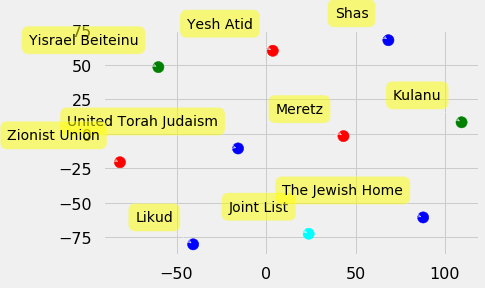

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
results_tsne = tsne.fit(X)

coords = results_tsne.embedding_

colors = ['blue','red','green','cyan','magenta','yellow','black','white']
label_colors = [colors[i] for i in clusters]

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o', c=label_colors
    )

#names = distance.index.values.tolist()
for label, x, y in zip(names, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()


# Distance Matrix
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html
- https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance

In [21]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

x = res_work_df_percentage_votes_transpose

res = pairwise_distances(x, metric='correlation') # cosine / jaccard / correlation / euclidean

distance = pd.DataFrame(res, index=res_work_df_percentage_votes_transpose.index, 
                        columns= res_work_df_percentage_votes_transpose.index)

distance

,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union
Joint List,0.000000,1.367228,1.349719,1.135943,1.093125,1.190827,1.060608,1.422978,1.086445,1.353393
Kulanu,1.367228,0.000000,0.387466,1.250750,0.821314,1.212273,1.114415,0.670297,0.821421,1.037505
Likud,1.349719,0.387466,0.000000,1.496075,0.600312,0.810013,1.035258,1.096753,0.774399,1.499037
Meretz,1.135943,1.250750,1.496075,0.000000,1.313049,1.351136,1.137316,0.802393,1.169799,0.416618
Shas,1.093125,0.821314,0.600312,1.313049,0.000000,1.032138,0.600705,1.317005,0.860421,1.414061
The Jewish Home,1.190827,1.212273,0.810013,1.351136,1.032138,0.000000,1.032231,1.368666,1.059215,1.496226
United Torah Judaism,1.060608,1.114415,1.035258,1.137316,0.600705,1.032231,0.000000,1.189887,1.009505,1.202599
Yesh Atid,1.422978,0.670297,1.096753,0.802393,1.317005,1.368666,1.189887,0.000000,1.018558,0.373886
Yisrael Beiteinu,1.086445,0.821421,0.774399,1.169799,0.860421,1.059215,1.009505,1.018558,0.000000,1.152551
Zionist Union,1.353393,1.037505,1.499037,0.416618,1.414061,1.496226,1.202599,0.373886,1.152551,0.000000


## Hierarchical Clustering

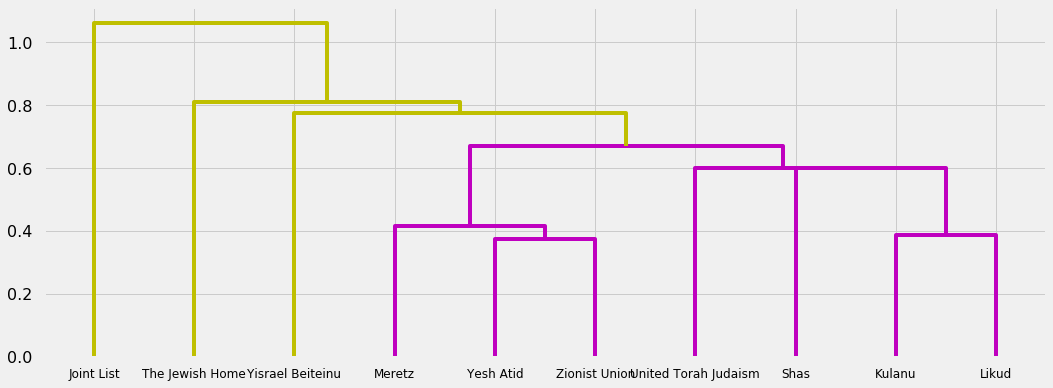

In [22]:
import scipy
from scipy.cluster import hierarchy

labels = distance.index.values.tolist()
sq_distance = scipy.spatial.distance.squareform(distance)

Z = hierarchy.linkage(sq_distance, 'single')
#plt.figure()
#dn = hierarchy.dendrogram(Z)

hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
#dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y', orientation='top', labels=labels)
dn1 = hierarchy.dendrogram(Z, ax=axes, above_threshold_color='y', orientation='top', labels=labels)
#dn2 = hierarchy.dendrogram(Z, ax=axes[1], above_threshold_color='#bcbddc', orientation='right', labels=labels)
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()

## Heatmap of Distance Matrix Reordered as the Dendrogram

In [23]:
new_order_distance = distance.reindex(dn1['ivl'])
new_order_distance = new_order_distance[dn1['ivl']] 

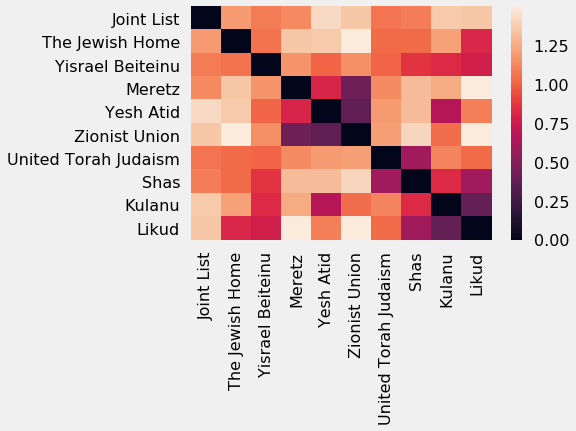

In [24]:
import seaborn as sns
ax = sns.heatmap(new_order_distance)

# Build Network

In [25]:
distance_cutoff = 1
parties = percantage_vote_per_pary.index.tolist()
parties

['Joint List',
 'Kulanu',
 'Likud',
 'Meretz',
 'Shas',
 'The Jewish Home',
 'United Torah Judaism',
 'Yesh Atid',
 'Yisrael Beiteinu',
 'Zionist Union']

In [26]:
import itertools
dist_list = list(distance.index)
all_2_org_combos = itertools.combinations(dist_list, 2)
max_dist = distance.max().max()

# Generate graph with nodes: 
G=nx.Graph()

for p in parties:
    G.add_node(p,
               name=p,
               p_vote=float(percantage_vote_per_pary[p]),             
               comm="0") 
    
# Connect nodes:
for combo in all_2_org_combos:
    combo_dist = distance[combo[0]][combo[1]]
    opp_dist = combo_dist - max_dist
    if distance[combo[0]][combo[1]] < distance_cutoff:
        G.add_edge(combo[0],combo[1],weight=float(abs(opp_dist)))
        

n = G.number_of_nodes()
m = G.number_of_edges()     
print("number of nodes in graph G: ",n)
print("number of edges in graph G: ",m)
print()

number of nodes in graph G:  10
number of edges in graph G:  12



## Communities and Modularity
- https://en.wikipedia.org/wiki/Modularity_%28networks%29
- https://en.wikipedia.org/wiki/Community_structure
- https://en.wikipedia.org/wiki/Louvain_Modularity

In [27]:
import community
communities = community.best_partition(G)
mod = community.modularity(communities,G)
print("modularity:", mod)

modularity: 0.359890518117921


In [28]:
if m > 0:         
    for k,v in communities.items():
        #for n in C:
        G.node[k]['comm'] = str(v)
else:
    print("Not runnig Community algorithm because the graph has no edges")

## Draw Network
- https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
- https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html

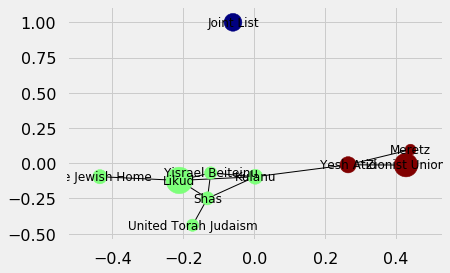

In [29]:
com_values = [communities.get(node) for node in G.nodes()]

p_votes = [d['p_vote'] for n,d in G.nodes(data=True)]
node_size=[v * 3000 for v in p_votes]

#pos=nx.spring_layout(G)
#pos=nx.spectral_layout(G)
#pos=nx.random_layout(G)
#pos=nx.circular_layout(G)
#pos = nx.shell_layout(G)
pos=nx.fruchterman_reingold_layout(G)
nx.draw_networkx(G,pos, cmap = plt.get_cmap('jet'), node_color = com_values, node_size=node_size, with_labels=True)

## Generate gexf file to view in Gephi
- Save network to a gexf file format
- Upload file in Gephi
- Order layout using: OpenOrd / Yifan Hu / Fruchterman Reingold
- Appearance of nodes:
  - Color nodes by community
  - Node size by number of votes (proper votes)
  - Label size by number of votes as well

In [30]:
graphFileName = "parties.gexf"
nx.write_gexf(G, graphFileName, encoding='utf-8')

# Now Generate a Similar Network For Cities 

## Distance Matrix
- The distance will be between each city - try the correlation metric first
- The vector of each city will be composed of the relative votes for each party

In [31]:
res_work_df_percentage_votes.head(5)

,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union
9,0.661678,0.027497,0.044379,0.011486,0.037069,0.001740,0.000522,0.007135,0.139053,0.052036
12,0.002625,0.055118,0.506562,0.023622,0.068241,0.204724,0.002625,0.039370,0.026247,0.031496
14,0.000000,0.086876,0.165434,0.035120,0.002773,0.047135,0.000924,0.231054,0.012939,0.400185
16,0.003279,0.029508,0.042623,0.075410,0.006557,0.026230,0.000000,0.111475,0.006557,0.681967
18,0.001385,0.023546,0.024931,0.098338,0.001385,0.029086,0.002770,0.078947,0.011080,0.703601


In [32]:
res_work_df.head()

,settlement_name_english,Settlement_code,Registered_voters,votes,bad_votes,proper_votes,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union,vote_rate
9,ABU SINAN,473,8363,5798,52,5746,3802,158,255,66,213,10,3,41,799,299,0.687074
12,ADDERET,1123,498,383,2,381,1,21,193,9,26,78,1,15,10,12,0.765060
14,ADI,1199,1348,1082,0,1082,0,94,179,38,3,51,1,250,14,433,0.802671
16,AFEQ,313,413,305,0,305,1,9,13,23,2,8,0,34,2,208,0.738499
18,AFIQIM,176,1048,729,7,722,1,17,18,71,1,21,2,57,8,508,0.688931


## Build Distance matrix and view it

In [33]:
modified = res_work_df_percentage_votes.copy()
modified.insert(loc=0, column='settlement_name_english', value=res_work_df['settlement_name_english'])
modified.set_index('settlement_name_english', inplace=True)

res_city = pairwise_distances(modified, metric='correlation') # cosine / jaccard / correlation / euclidean
distance = pd.DataFrame(res_city, index=modified.index, 
                        columns= modified.index)
distance.head()

settlement_name_english,ABU SINAN,ADDERET,ADI,AFEQ,AFIQIM,AFULA,AHI'EZER,AHIHUD,AHISAMAKH,AHITUV,...,ZIPPORI,ZIQIM,ZOFIT,ZOR'A,ZOVA,ZUFIM,ZUR HADASSA,ZUR MOSHE,ZUR YIZHAQ,ZURIT
settlement_name_english,,,,,,,,,,,,,,,,,,,,,
ABU SINAN,0.000000,1.211834,1.259032,1.141121,1.135686,1.208501,1.245781,1.182134,1.210106,1.315924,...,1.245725,1.227144,1.197439,1.112392,1.133996,1.268855,1.317564,1.218959,1.284522,1.205857
ADDERET,1.211834,0.000000,0.853693,1.129124,1.151804,0.096345,0.347389,0.011514,0.169266,0.462023,...,0.960233,1.032226,1.065060,1.163105,1.124035,0.235380,0.447425,1.028081,0.862983,1.065374
ADI,1.259032,0.853693,0.000000,0.124433,0.156268,0.662332,1.152147,0.860110,0.897701,0.128994,...,0.030915,0.262561,0.081059,0.181631,0.133353,0.874406,0.126133,0.031633,0.002030,0.048917
AFEQ,1.141121,1.129124,0.124433,0.000000,0.002440,0.945551,1.258900,1.139386,1.137671,0.381049,...,0.047014,0.149594,0.015850,0.015784,0.001357,1.062293,0.314600,0.035766,0.133507,0.024089
AFIQIM,1.135686,1.151804,0.156268,0.002440,0.000000,0.974872,1.273689,1.163709,1.164228,0.419902,...,0.063536,0.137141,0.022486,0.009165,0.002667,1.074580,0.341114,0.053832,0.165426,0.039341


## Build Network

### Build the network of cities with the following attributes
- distance_cutoff = 0.01
- min_proper_votes = 1000 : use only cities where proper_votes > min_proper_votes
- Data for each node: city code, city name, proper votes, community
- Edge weight: similarity 

In [34]:
distance_cutoff = 0.01
min_proper_votes = 1000

In [35]:
res_work_df.shape

(724, 17)

### Create dictionaries if neccassary

### Create list of cities that hold all the constraints
- How many cities hold the constrains?

In [36]:
new_df = res_work_df[res_work_df.proper_votes > min_proper_votes]
new_df = new_df[['settlement_name_english','Settlement_code', 'proper_votes']]
new_df.set_index('settlement_name_english', inplace=True)
print('There are {} cities that hold the constrains.'.format(new_df.shape[0]))
new_df

There are 200 cities that hold the constrains.


,Settlement_code,proper_votes
settlement_name_english,,
ABU SINAN,473,5746
ADI,1199,1082
AFULA,7700,22908
AHUZZAT BARAQ,1330,1164
AKKO,7600,25729
ALFE MENASHE,3750,4237
ALLON SHEVUT,3604,1659
AR'ARA,637,7953
ARI'EL,3570,9717


In [37]:
dist_list = list(new_df.index)
all_2_org_combos = itertools.combinations(dist_list, 2)
max_dist = distance.max().max()

### Network Generation
- How many nodes?
- How many edges?

In [38]:
G=nx.Graph()
cities = new_df.index.tolist()

for c in cities:
    G.add_node(c,
               code = str(new_df['Settlement_code'][c]),
               name=c,
               p_vote=float(new_df['proper_votes'][c]),
               comm="0") 
# Connect nodes:
for combo in all_2_org_combos:
    combo_dist = distance[combo[0]][combo[1]]
    opp_dist = combo_dist - max_dist

    if distance[combo[0]][combo[1]] < distance_cutoff:
        G.add_edge(combo[0],combo[1],weight=float(abs(opp_dist)))

n = G.number_of_nodes()
m = G.number_of_edges()     
print("Number of nodes in graph G: ",n)
print("Number of edges in graph G: ",m)

Number of nodes in graph G:  200
Number of edges in graph G:  1069


### Run community algorithm
- How many communities?
- How many nodes in the largest community?
- What is the modularity score?

In [39]:
communities = community.best_partition(G)
mod = community.modularity(communities,G)

In [40]:
print("Number of communities: {}".format(nx.number_connected_components(G)))

Number of communities: 72


In [41]:
maxNode=max(nx.connected_component_subgraphs(G),key=len)
print("The largest commuinity contains {} nodes".format(maxNode.number_of_nodes()))

The largest commuinity contains 45 nodes


In [55]:
list(nx.connected_component_subgraphs(G)

In [42]:
print("The modularity score:", mod)

The modularity score: 0.3517414027697776


### Add communitites information to the nodes in the network

In [43]:
if m > 0:         
    for k,v in communities.items():
        #for n in C:
        G.node[k]['comm'] = str(v)
else:
    print("Not runnig Community algorithm because the graph has no edges")

## Draw Network
- Set node size according to votes / degree
- Try different layouts

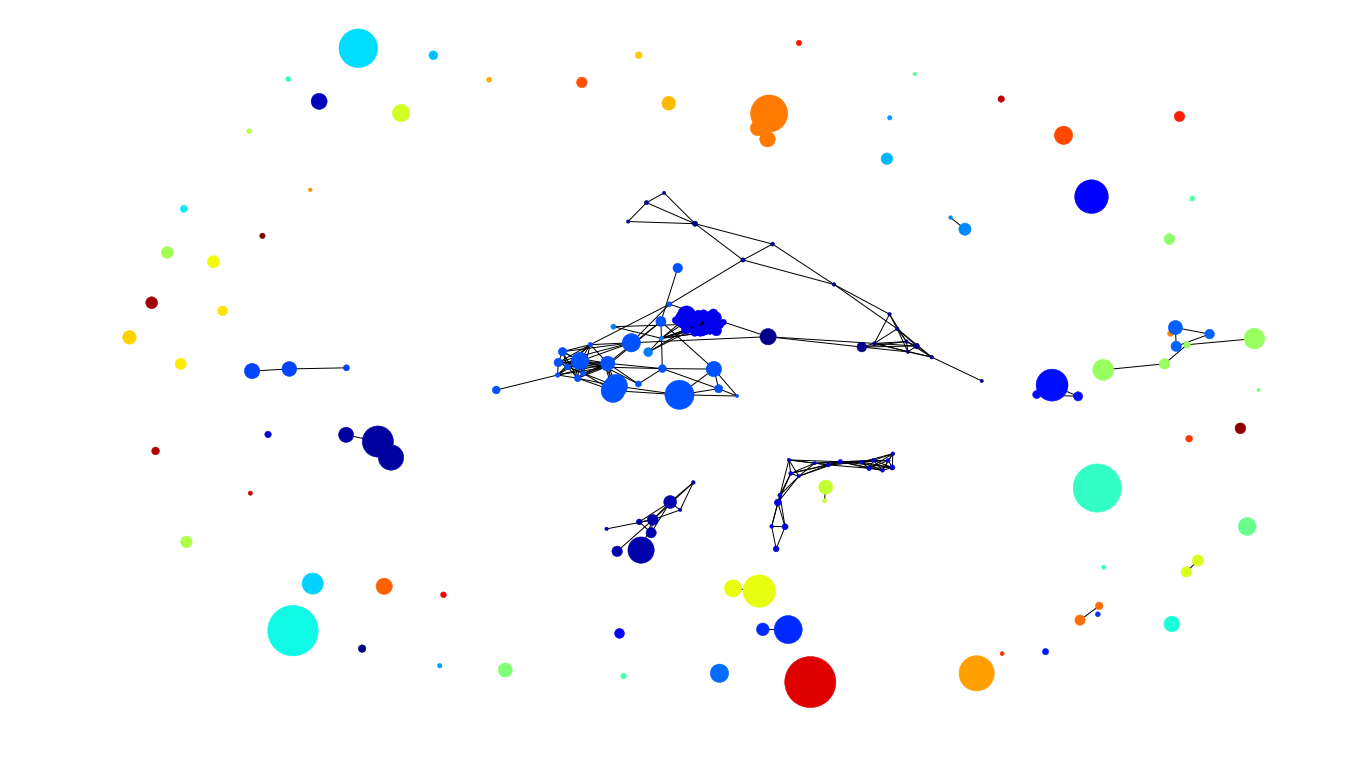

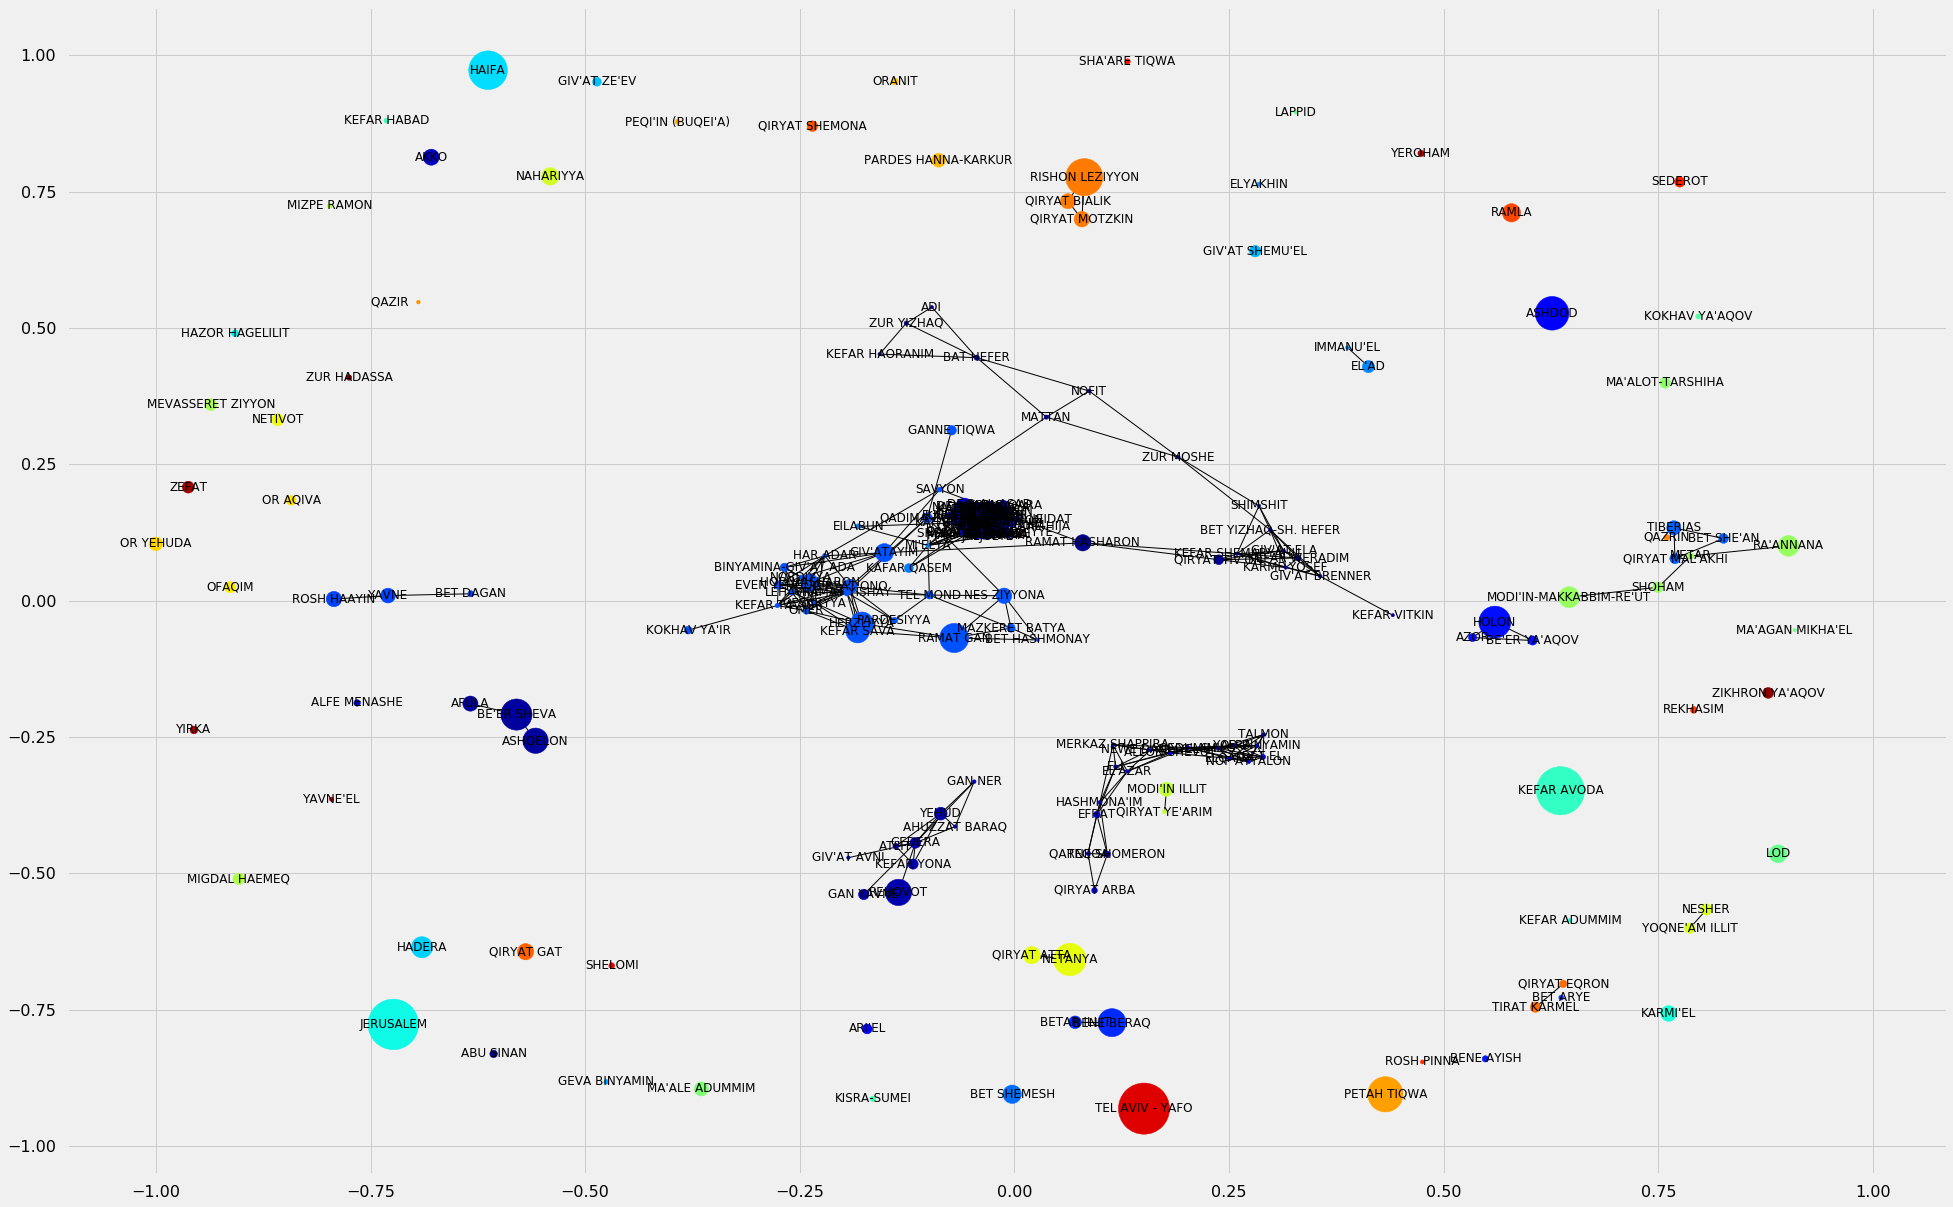

In [44]:
com_values = [communities.get(node) for node in G.nodes()]
p_votes = [d.get('p_vote') for n,d in G.nodes(data=True)]
node_size=[v * 0.01 for v in p_votes]

pos=nx.spring_layout(G, iterations=20)
plt.figure(figsize=(18,10)) 
nx.draw(G,pos, cmap = plt.get_cmap('jet'), node_color = com_values, node_size=node_size, with_labels=False) 
plt.figure(figsize=(30,20)) 
nx.draw_networkx(G,pos, cmap = plt.get_cmap('jet'), node_color = com_values, node_size=node_size, with_labels=True)

## Calculate:

### Sum over network
- Using the network, sum proper votes for each community 
- Print the top 5 communities (in sum of votes) and the cities that compose them
- For one of the cities in a top-5 community, print the votes for each party 

#### Proper votes by community

In [45]:
grouped = {}
grouped_cities = {}

for key, value in sorted(communities.items()):
    grouped_cities.setdefault(value, []).append(key)

for com, cities in grouped_cities.items():
    sum = 0
    for city in cities:
        sum += new_df['proper_votes'][city]
    grouped[com] = sum

series = pd.Series(grouped, name='Total Proper Votes')
series.index.name = 'Community'
proper_df = series.reset_index()
proper_df.set_index('Community', inplace=True)
proper_df

,Total Proper Votes
Community,
0,5746
1,59471
2,184385
3,126356
4,25729
5,4237
6,35112
7,301446
8,9717


#### Top 5 communities (in sum of votes) and the cities that compose them

In [46]:
top_five = proper_df.nlargest(5, 'Total Proper Votes')
top_five['Cities'] = ""
grouped_cities
for index, row in top_five.iterrows():
    top_five['Cities'][index] = ", ".join(grouped_cities[index])

detailed_df = top_five.style.set_properties(**{'text-align': 'left'})
detailed_df

,Total Proper Votes,Cities
Community,,
15,384705,"BET HASHMONAY, BINYAMINA-GIV'AT ADA, EVEN YEHUDA, GANNE TIQWA, GIV'ATAYIM, HAR ADAR, HERZLIYYA, HOD HASHARON, KEFAR SAVA, KEFAR TAVOR, KOKHAV YA'IR, LEHAVIM, MAZKERET BATYA, NES ZIYYONA, NORDIYYA, OMER, PARDESIYYA, QADIMA-ZORAN, QESARYYA, QIRYAT ONO, RAMAT GAN, RAMAT YISHAY, SAVYON, TEL MOND"
7,301446,"AR'ARA, ARRABE, BAQA AL-GHARBIYYE, BASMA, BI'NE, BU'EINE-NUJEIDAT, DABURIYYA, DEIR AL-ASAD, DEIR HANNA, EIN MAHEL, FUREIDIS, I'BILLIN, IKSAL, JALJULYE, JUDEIDE-MAKER, KABUL, KAFAR BARA, KAFAR KANNA, KAFAR MANDA, KAFAR QARA, KAFAR YASIF, KAOKAB ABU AL-HIJA, MA'ALE IRON, MAJD AL-KURUM, MAZRA'A, MESHHED, MUQEIBLE, NAHEF, NAZARETH, QALANSAWE, REINE, SAKHNIN, SHA'AB, SHEIKH DANNUN, SULAM, TAMRA, TAYIBE, TIRE, TUR'AN, UMM AL-FAHM, YAFI, ZEMER"
67,261345,TEL AVIV - YAFO
27,255286,JERUSALEM
30,232681,KEFAR AVODA


####  Votes for each party for one of the cities in a top-5 communities

In [47]:
ind = top_five.index[0]
city = grouped_cities[ind][0]
print ('The votes of {}:'.format(city))
city_row = res_work_df_city.loc[(res_work_df_city['settlement_name_english'] == city)]
city_row = city_row.rename(index={city_row.index[-1]: city})
city_row.iloc[:,6:]

The votes of BET HASHMONAY:


,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union
BET HASHMONAY,0,110,300,41,19,59,1,178,12,346


## Generate gexf file to view in Gephi
- Save network to a gexf file format
- Upload file in Gephi
- Order layout using: OpenOrd / Yifan Hu / Fruchterman Reingold
- Appearance of nodes:
  - Color nodes by community
  - Node size by number of votes (proper votes)
  - Label size by number of votes as well
  - Take a screen-shot of the entire network
  - Take a screen-shot of the largest community (sum over proper votes)

In [48]:
graphFileName = "cities.gexf"
nx.write_gexf(G, graphFileName, encoding='utf-8')

### OpenOrd

![OpenOrd](Graphs/OpenOrd.png)
![OpenOrd](Graphs/OpenOrd2.png)

### Yifan Hu

![YifanHu](Graphs/YifanHu.png)
![YifanHu](Graphs/YifanHu2.png)

### Fruchterman Reingold

![Fruchterman](Graphs/Fruchterman.png)
![Fruchterman](Graphs/Fruchterman2.png)

## Questions on Network: 
- Why large Cities are a singelton community?
- Which cities are in the community of Beer Sheva?

####  The technical explanation that big cities are singelton communities is that they do not pass the 'distance_cutoff'.
##### Let's look at the city 'Tel Aviv':

In [49]:
desc = distance.copy()
desc = desc.loc["TEL AVIV - YAFO"]
desc.drop("TEL AVIV - YAFO", inplace=True)
desc.describe()

count    723.000000
mean       0.434739
std        0.437150
min        0.011681
25%        0.081669
50%        0.160369
75%        0.802269
max        1.368837
Name: TEL AVIV - YAFO, dtype: float64

##### We can see that the minimal values do not pass the threshold

In [50]:
print ("The distance cutoff is:", distance_cutoff)

The distance cutoff is: 0.01


##### The logical explanation is that the votes are somehow normalized and mostly similar to all other cities,  
##### especially because of the large number of voters in the big cities & it's distribution:

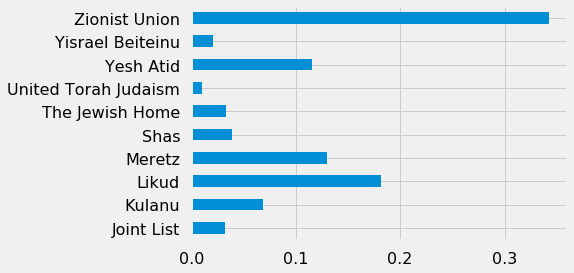

In [51]:
modified.loc["TEL AVIV - YAFO"].plot(kind='barh')

#### Cities that are in the community of Beer Sheva

In [52]:
c_name = "BE'ER SHEVA"
index = [y[1] for x, y in enumerate(sorted(communities.items())) if y[0] == c_name]
com_cities = grouped_cities[index[0]]
com_cities.remove(c_name)
print ("The cities that are in the same community as {0} are: {1}".format(c_name, com_cities))

The cities that are in the same community as BE'ER SHEVA are: ['AFULA', 'ASHQELON']
